# Analysis of max-min length ratio

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [2]:
# Traversal all midline files
DIR = "./data/midline"

files = os.listdir(DIR)
filenames = []

for file in files:
    if not os.path.isdir(file): 
        filenames.append(file)
        
filenames

['lengths_0hr_20uM_TTAP2_ngcampmov_30x4fps_50%intensity_exp3_a3.csv',
 'lengths_0hr_Cafree+EGTA_ngcampmov_30x4fps_50%intensity_exp2_a1.csv',
 'lengths_0hr_Control_ngcampmov_30x4fps_50%intensity_exp3_a3.csv',
 'lengths_10uM_nifedipine-EGCaMP_exp2_a2_25x10fps_5%_30mins.csv',
 'lengths_Control-EGCaMP_exp1_a1_30x10fps_5%.csv',
 'lengths_Control-EGCaMP_exp1_a2_25x10fps_30mins.csv',
 'lengths_Ctrl-NGCaMP6-40x-1x1-4fps-30mins.avi (gray rendering)(40fpsplaybackt.csv',
 'lengths_EGCaMP_ctrl_30mins_40x_10fps_mv1.csv',
 'lengths_EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.csv',
 'lengths_EndoRCaMP_ctrl_30mins_40x_10fps_mv1.csv',
 'lengths_john-long-cycles_grayscale.csv',
 'lengths_NGCaMP6_50X_20fps_M1_001_R1.csv',
 'lengths_peduncle_0hour_40x_4fps_ex3_002.csv',
 'lengths_Peduncle_0hour_50x_4fps_exp4.csv',
 'lengths_PreBisectROIs.csv',
 'lengths_Pre_Bisect_40x_4fps_ex4.csv',
 'lengths_Pre_Bisect_40x_4fps_ex4_ROIs.csv']

In [3]:
ratios_all = []

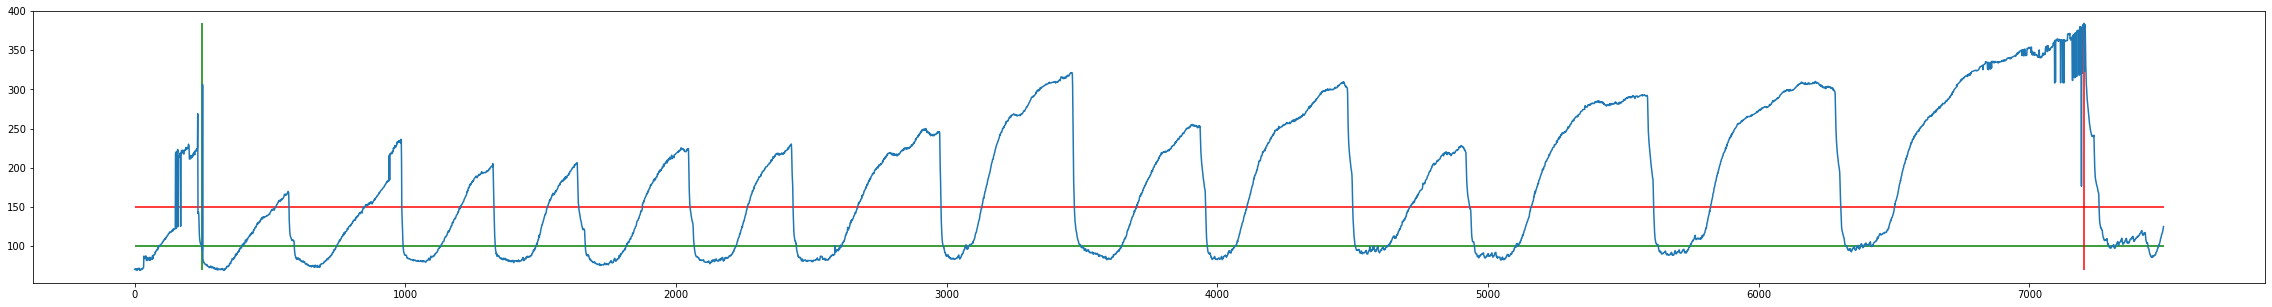

In [4]:
# Plot the lengths
FILENAME = 'lengths_Pre_Bisect_40x_4fps_ex4.csv'
HIGHTHRES = 150
LOWTHRES = 100
XMIN = 250
XMAX = 7200
FPS = 4
lengths = pd.read_csv(DIR + '/' + FILENAME, header=0).values
lengths = np.reshape(lengths, -1)
# lengths = scipy.signal.savgol_filter(lengths, 101, 3)
plt.figure(figsize=(40, 5))
plt.plot(lengths)
plt.hlines(HIGHTHRES, 0, len(lengths), 'r')
plt.hlines(LOWTHRES, 0, len(lengths), 'g')
plt.vlines(XMIN, min(lengths), max(lengths), 'g')
plt.vlines(XMAX, min(lengths), max(lengths), 'r')
plt.show()

In [421]:
# Slice the lengths data
lengths = lengths[XMIN:XMAX]

In [422]:
# Higher than high threshold
flags_hi = lengths > HIGHTHRES

start = -1
end = -1
ranges_hi = []
for j, flag in enumerate(flags_hi):
    if flag == True and (j == 0 or flags_hi[j-1] == False):
        start = j
    if flag == False and ((j > 0 and flags_hi[j-1] == True)) or (flag == True and j == len(lengths)-1):
        end = j
        ranges_hi.append([start, end])
        
# Lower than low threshold
flags_lo = lengths < LOWTHRES

start = -1
end = -1
ranges_lo = []
for j, flag in enumerate(flags_lo):
    if flag == True and (j == 0 or flags_lo[j-1] == False):
        start = j
    if flag == False and j > 0 and flags_lo[j-1] == True:
        end = j
        ranges_lo.append([start, end])

In [423]:
# Check if the ranges can be paired
print(len(ranges_lo))
print(len(ranges_hi))

14
14


In [424]:
# Get the mins and maxs

minmax = []
for j in range(len(ranges_lo)):
    minlen = np.min(lengths[ranges_lo[j][0]:ranges_lo[j][1]])
    maxlen = np.max(lengths[ranges_hi[j][0]:ranges_hi[j][1]])
    minmax.append([minlen, maxlen])
minmax

[[67.29273370628516, 162.3248167551016],
 [73.80626776900877, 225.7944944446135],
 [71.41615135397961, 203.18020304515068],
 [74.4995226070681, 199.07584079416247],
 [75.31891987855727, 227.7663970114571],
 [76.35663341806335, 229.50008898580722],
 [73.45201969838335, 256.04550705210926],
 [73.66727751081523, 329.7097715645061],
 [82.00379737631724, 259.3549945020381],
 [77.20981323078983, 313.22765390418925],
 [84.6383675697311, 227.89869774184805],
 [83.94734502104129, 298.26248713366357],
 [84.1591644966507, 310.3336983931699],
 [89.93766300369279, 364.1913098368073]]

In [425]:
# Calculate the ratios

ratios = []
for x in minmax:
    ratios.append(x[1]/x[0])
ratios

[2.4122190883729906,
 3.0592861727039464,
 2.845017537252497,
 2.672176060028541,
 3.0240263320119714,
 3.0056339405282815,
 3.485887904832448,
 4.475661144340522,
 3.1627193227632167,
 4.056837347448471,
 2.6926168862376616,
 3.552971056546273,
 3.687461730986176,
 4.049374841125834]

In [426]:
# Extend the ratios
ratios_all.extend(ratios)

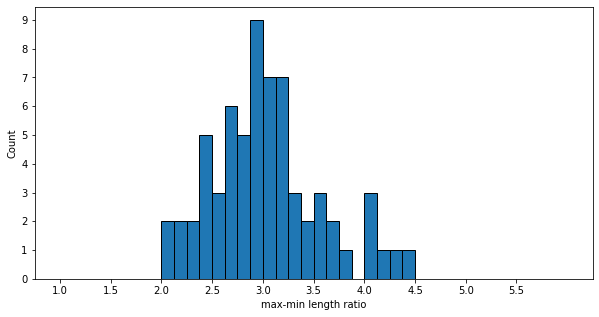

In [430]:
# Plot the histogram
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.hist(ratios_all, bins=40, range=(1, 6), edgecolor='k')
ax.set_xticks(np.arange(1, 6, 0.5))
ax.set_xlabel("max-min length ratio")
ax.set_ylabel("Count")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [437]:
print('median= {:.2f}'.format(np.median(ratios_all)), '\nmean= {:.2f}'.format(np.mean(ratios_all)), '\nmin= {:.2f}'.format(np.min(ratios_all)), '\nmax= {:.2f}'.format(np.max(ratios_all)))

median= 2.98 
mean= 3.04 
min= 2.05 
max= 4.48


In [434]:
# Save results
df = pd.DataFrame(ratios_all)
df.to_csv("./data/ratios.csv", index=False)